Dataset: https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user

Goal: Dự đoán được độ tuổi trung bình của 1 nhóm nghành nghề dựa vào gender và occupation

Model Selection: Linear Regression và Polynomial Regression

Why?

* Linear Regression: Mô hình cơ bản để tìm mối quan hệ tuyến tính giữa nghề nghiệp/giới tính và độ tuổi.
* Polynomial Regression (2): mong muốn sự liên quan giữa nghề và giới tính sẽ giúp dự đoán chính xác hơn.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import root_mean_squared_error
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')
print(users.head(10))

   user_id  age gender     occupation zip_code
0        1   24      M     technician    85711
1        2   53      F          other    94043
2        3   23      M         writer    32067
3        4   24      M     technician    43537
4        5   33      F          other    15213
5        6   42      M      executive    98101
6        7   57      M  administrator    91344
7        8   36      M  administrator    05201
8        9   29      M        student    01002
9       10   53      M         lawyer    90703


In [38]:
users_grouped = users.groupby(['occupation', 'gender'])['age'].mean().reset_index()
print(users_grouped.head(10))
users_grouped.value_counts().count()

      occupation gender        age
0  administrator      F  40.638889
1  administrator      M  37.162791
2         artist      F  30.307692
3         artist      M  32.333333
4         doctor      M  43.571429
5       educator      F  39.115385
6       educator      M  43.101449
7       engineer      F  29.500000
8       engineer      M  36.600000
9  entertainment      F  31.000000


np.int64(41)

In [30]:
X = pd.get_dummies(users_grouped[['occupation','gender']])
y = users_grouped['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Linear Regression model

In [31]:
lin_regr = LinearRegression()
lin_regr.fit(X_train, y_train)
lin_y_pred = lin_regr.predict(X_test)

rmse = root_mean_squared_error(y_test, lin_y_pred)
print(f"RMSE: {rmse:3.3} ({rmse/np.mean(lin_y_pred)*100:3.3}%)")
score = lin_regr.score(X_train,y_train)
print('Model determination: ', score)


RMSE: 9.14 (23.3%)
Model determination:  0.8011485808848373


Polynomial Regression model

In [ ]:
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train, y_train)
pip_y_pred = pipeline.predict(X_test)

rmse = root_mean_squared_error(y_test, pip_y_pred)
print(f"RMSE: {rmse:3.3} ({rmse/np.mean(pip_y_pred)*100:3.3}%)")
score = pipeline.score(X_train,y_train)
print('Model determination: ', score)


RMSE: 10.2 (26.7%)
Model determination:  1.0


| Metrics | Linear Regression | Polynomial Regression |
| ------- | ----------------- | --------------------- |
| RMSE (Test) | 9.14 | 10.2 |
|R2 Score (Train)|0.80|1.0|

Bị overfitting:

* Dữ liệu sau khi gom nhóm khá ít (41 mẫu) nhưng số lượng đặc trưng sau khi One-Hot Encoding lại nhiều.

* Polynomial Regression đã trở nên quá phức tạp, nó học thuộc dữ liệu train nhưng mất khả năng tổng quát hóa trên dữ liệu test.
  
Kết luận: Mô hình PR quá phức tạp với tập dữ liệu nhỏ và dạng phân loại này, mô hình LR sẽ hoạt động hiệu quả và ổn định hơn.

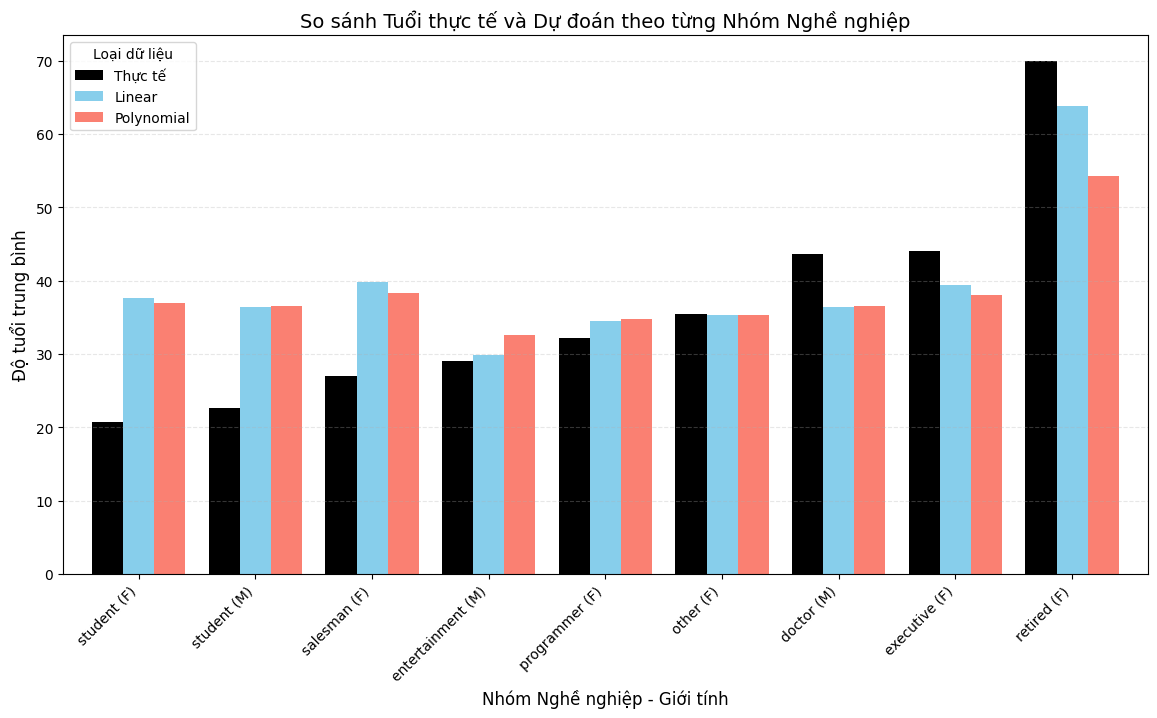

In [ ]:
test_indices = y_test.index
labels = users_grouped.loc[test_indices].apply(lambda x: f"{x['occupation']} ({x['gender']})", axis=1)

comparison = pd.DataFrame({
    'Nhãn': labels,
    'Thực tế': y_test.values,
    'Linear': lin_y_pred,
    'Polynomial': pip_y_pred
})

comparison = comparison.sort_values(by='Thực tế')

comparison_subset = comparison.head(15)

ax = comparison_subset.plot(x='Nhãn', y=['Thực tế', 'Linear', 'Polynomial'], 
                            kind='bar', 
                            figsize=(14, 7), 
                            color=['black', 'skyblue', 'salmon'],
                            width=0.8)

plt.title('So sánh Tuổi thực tế và Dự đoán theo từng Nhóm Nghề nghiệp', fontsize=14)
plt.ylabel('Độ tuổi trung bình', fontsize=12)
plt.xlabel('Nhóm Nghề nghiệp - Giới tính', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loại dữ liệu')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()